In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

## Load Dataset

In [2]:
data = pd.read_csv("car data.csv",encoding = 'latin')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
data.shape

(301, 9)

In [4]:
data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [5]:
data.duplicated().sum()

2

In [6]:
data.drop_duplicates(inplace = True)
data.shape

(299, 9)

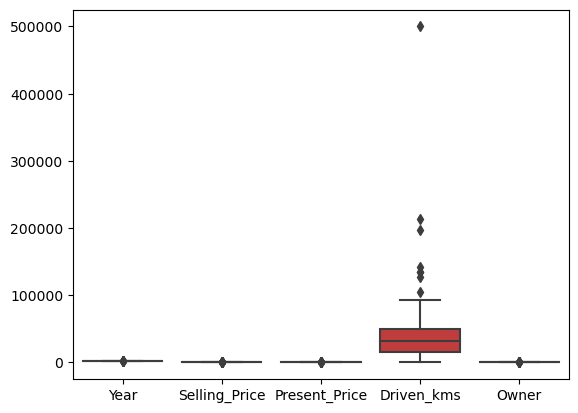

In [7]:
sns.boxplot(data)
plt.show()

In [8]:
df = data.copy()

In [9]:
list_col = data.select_dtypes("number").columns
list_col

Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner'], dtype='object')

In [10]:
for i in list_col:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]
    print(df.shape)
    print(i)

(292, 9)
Year
(276, 9)
Selling_Price
(273, 9)
Present_Price
(270, 9)
Driven_kms
(260, 9)
Owner


In [11]:
df.shape

(260, 9)

## Model Training

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [13]:
encode_list = df.select_dtypes("object").columns

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in encode_list:
    df[i] = le.fit_transform(df[i])

df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,81,2014,3.35,5.59,27000,2,0,1,0
1,84,2013,4.75,9.54,43000,1,0,1,0
2,61,2017,7.25,9.85,6900,2,0,1,0
3,87,2011,2.85,4.15,5200,2,0,1,0
4,83,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,62,2016,9.50,11.60,33988,1,0,1,0
297,60,2015,4.00,5.90,60000,2,0,1,0
298,62,2009,3.35,11.00,87934,2,0,1,0
299,62,2017,11.50,12.50,9000,1,0,1,0


In [18]:
df["Owner"].value_counts()

0    260
Name: Owner, dtype: int64

In [33]:
X = df.drop(["Selling_Price","Owner"],axis = 1) 
y = df["Selling_Price"]

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(208, 7)
(52, 7)
(208,)
(52,)


In [35]:
cls_model = LinearRegression()

In [36]:
cls_model.fit(X_train,y_train)

LinearRegression()

In [37]:
y_pred = cls_model.predict(X_test)

In [38]:
y_pred

array([ 5.64706078,  6.51813283,  4.61885527,  3.81457522,  4.34516431,
        2.74105438,  4.67505213,  4.34099276,  3.52459384,  0.35899582,
        3.52718064,  5.76734211,  1.7663329 , -0.13601492,  0.85791829,
        6.84028235,  4.99071418, -0.15892913,  4.3212951 ,  7.29951274,
        7.88008104,  4.24283011,  7.25731445,  5.72432775,  1.28110699,
        6.46343786,  0.24117661,  4.54932073,  8.22018148,  2.13643311,
        1.27233962,  4.36953328,  0.152768  , -2.11111611,  4.04694021,
       10.15184898,  1.8240739 ,  5.45188873,  6.93924802,  1.03213584,
       -0.12931108,  1.97603192,  3.91251151,  0.61438312,  1.62426485,
        0.49391034,  5.87708909,  6.81883135,  0.09021094,  7.83089188,
        4.6821422 ,  5.00712746])

In [39]:
r2_score(y_test,y_pred)

0.8719493964510727

In [40]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=17)


rf_model.fit(X_train, y_train)


rf_Y_pred = rf_model.predict(X_test)


# rf_mse = mean_squared_error(ytest, rf_Y_pred)
rf_r2 = r2_score(y_test, rf_Y_pred)
# print(f"Random Forest Mean Squared Error (MSE): {rf_mse:.2f}")
print(f"Random Forest R-squared (R2): {rf_r2:.2f}")

Random Forest R-squared (R2): 0.94
